# 🏠 Airbnb Exploratory Data Analysis

This notebook performs an exploratory data analysis (EDA) on Airbnb listings from a selected city.

In [1]:
# 📦 Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 📁 Load the dataset
df = pd.read_csv('data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1051911,https://www.airbnb.com/rooms/1051911,20250303043221,2025-03-03,city scrape,Tree Topz by Beach Stays,Treetopz is a secluded haven perched high abov...,Pittwater on the Northern Beaches of Sydney is...,https://a0.muscache.com/pictures/miso/Hosting-...,24721535,...,4.71,4.71,4.52,PID-STRA-21277,f,73,73,0,0,0.17
1,1100380,https://www.airbnb.com/rooms/1100380,20250303043221,2025-03-03,city scrape,"Fabulous location, fabulous place",Fresh and fun Hollywood Regency apartment in t...,The cafes and bars are fantastic. Also some br...,https://a0.muscache.com/pictures/048fc478-6378...,6044810,...,4.92,4.97,4.76,PID-STRA-67379,f,1,1,0,0,0.35
2,1125557,https://www.airbnb.com/rooms/1125557,20250303043221,2025-03-03,city scrape,LUXURY BEACHFRONT APARTMENT,"My warm, comfortable two bedroom apartment lie...",I love being so close to nature. Sometimes I s...,https://a0.muscache.com/pictures/77657551/2b77...,8402583,...,4.89,4.86,4.60,PID-STRA-22786,f,1,0,1,0,0.37
3,1130919,https://www.airbnb.com/rooms/1130919,20250303043221,2025-03-03,city scrape,Coogee Beach House,Coogee Beach House is contemporary residence i...,In this house you are between Clovelly and Coo...,https://a0.muscache.com/pictures/d7d9da32-d820...,4813247,...,5.00,5.00,4.77,PID-STRA-5749,f,1,1,0,0,0.15
4,11156,https://www.airbnb.com/rooms/11156,20250303043221,2025-03-03,city scrape,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,...,4.76,4.82,4.71,NaN,f,1,0,1,0,1.04


In [3]:
# 🔍 Basic Info & Cleaning
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18017 entries, 0 to 18016
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18017 non-null  int64  
 1   listing_url                                   18017 non-null  object 
 2   scrape_id                                     18017 non-null  int64  
 3   last_scraped                                  18017 non-null  object 
 4   source                                        18017 non-null  object 
 5   name                                          18017 non-null  object 
 6   description                                   17703 non-null  object 
 7   neighborhood_overview                         8410 non-null   object 
 8   picture_url                                   18017 non-null  object 
 9   host_id                                       18017 non-null 

neighbourhood_group_cleansed    18017
calendar_updated                18017
host_neighbourhood              13103
neighbourhood                    9607
neighborhood_overview            9607
                                ...  
minimum_maximum_nights              0
maximum_maximum_nights              0
minimum_nights_avg_ntm              0
maximum_nights_avg_ntm              0
amenities                           0
Length: 79, dtype: int64

In [4]:

#Select Relevant Columns

columns_to_keep = [
    'name', 'neighbourhood_cleansed', 'room_type', 'price',
    'minimum_nights', 'availability_365',
    'number_of_reviews', 'review_scores_rating'
]
df = df[columns_to_keep]

In [5]:
#Clean price & Drop Nulls

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df.dropna(inplace=True)

# Re-check cleaned data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 13074 entries, 0 to 17892
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    13074 non-null  object 
 1   neighbourhood_cleansed  13074 non-null  object 
 2   room_type               13074 non-null  object 
 3   price                   13074 non-null  float64
 4   minimum_nights          13074 non-null  int64  
 5   availability_365        13074 non-null  int64  
 6   number_of_reviews       13074 non-null  int64  
 7   review_scores_rating    13074 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 919.3+ KB


,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating
count,13074.000000,13074.000000,13074.000000,13074.000000,13074.000000
mean,331.094233,11.725945,180.624140,45.643032,4.710105
std,475.582474,28.945108,115.918958,75.610349,0.426123
min,16.000000,1.000000,0.000000,1.000000,1.000000
25%,154.000000,1.000000,76.000000,5.000000,4.630000
50%,231.000000,2.000000,166.000000,18.000000,4.830000
75%,360.000000,4.000000,289.000000,53.000000,4.970000
max,29199.000000,500.000000,365.000000,1189.000000,5.000000


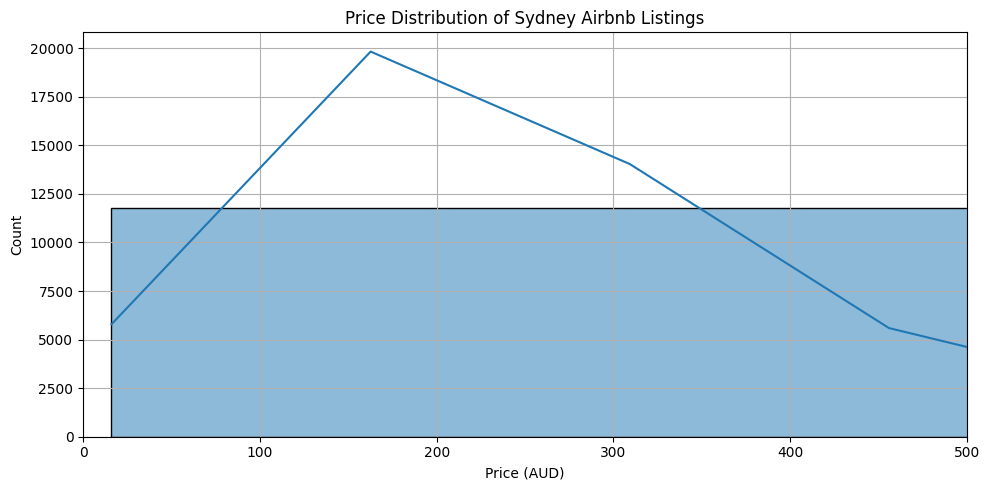

In [7]:
# 📊 Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution of Sydney Airbnb Listings')
plt.xlabel('Price (AUD)')
plt.xlim(0, 500)  # For better visibility
plt.grid(True)
plt.tight_layout()
plt.savefig('img/price_distribution.png')  # Saving chart
plt.show()

/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_9600/1672912045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neigh.values, y=top_neigh.index, palette='Blues_d')


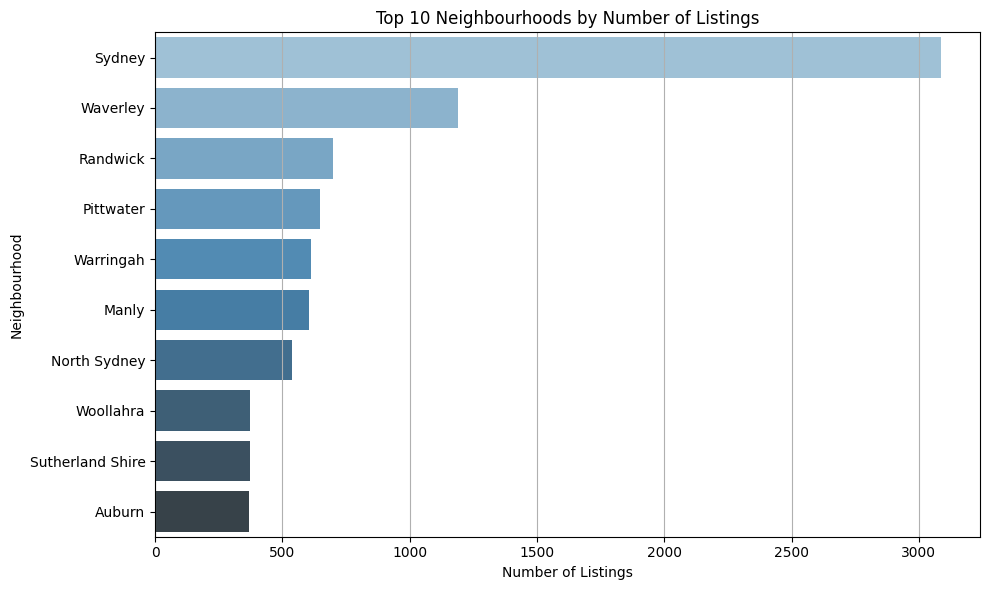

In [9]:
# 🏘️ Top 10 Neighbourhoods by Listings
top_neigh = df['neighbourhood_cleansed'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_neigh.values, y=top_neigh.index, palette='Blues_d')
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig('img/top_neighbourhoods.png')
plt.show()

/var/folders/sd/0t1nrpz904364fg8qw1f_y7w0000gn/T/ipykernel_9600/3798814712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index, palette='pastel')


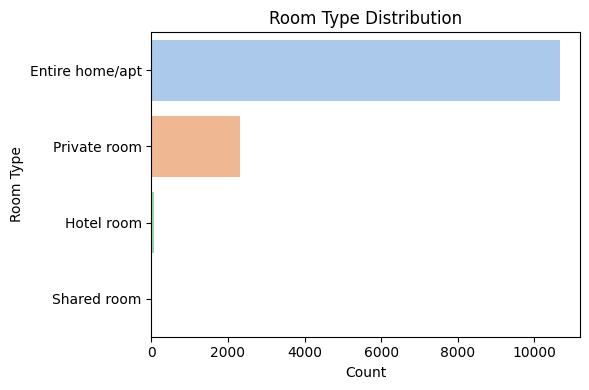

In [10]:
# 🛏️ Room Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index, palette='pastel')
plt.title('Room Type Distribution')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.tight_layout()
plt.savefig('img/room_type_distribution.png')
plt.show()

## ✅ Final Conclusions

This analysis of Airbnb listings in Sydney reveals several interesting patterns:

- **Affordability**: The majority of listings are priced under $200 AUD per night, making Airbnb a competitive option compared to hotels in the city. There is a sharp drop in listing volume beyond $300 AUD.

- **Neighbourhood Concentration**: The highest number of listings are concentrated in central and coastal areas such as Sydney City, Waverley, Randwick, and Manly. This suggests strong tourist demand in these zones.

- **Accommodation Types**: "Entire home/apt" listings dominate the platform, reflecting a preference for full-property rentals over private/shared rooms. This could be driven by traveler preference or local regulation.

- **Data Quality**: Some columns in the dataset contain high levels of missing values (e.g., host_neighbourhood, reviews), which should be considered when doing more complex or model-based analysis.

This project demonstrates how exploratory data analysis (EDA) can help uncover trends, support pricing strategies, and guide business decisions in the short-term rental market.